In [4]:
import os

import jax 
from jax import numpy as jnp
from jax import random as jr

from matplotlib import pyplot as plt
from skimage.io import imread, imsave

In [7]:
img = imread('./The_Cat.jpg')

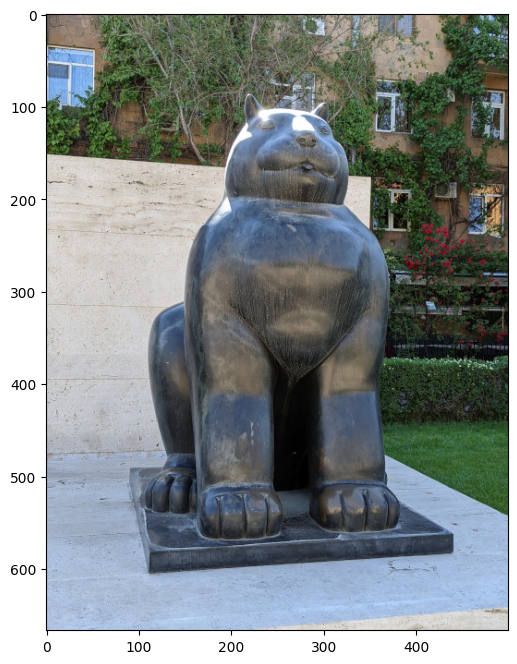

In [8]:
plt.figure(figsize=(6, 8))
plt.imshow(img)

In [9]:
seed = 42
key = jr.key(seed)

In [11]:
std_noise = jr.normal(key, img.shape)

In [12]:
std_noise.min(), std_noise.max(), std_noise.mean(), std_noise.std()

(Array(-5.012798, dtype=float32),
 Array(4.638076, dtype=float32),
 Array(5.15859e-05, dtype=float32),
 Array(1.0000969, dtype=float32))

In [13]:
noise = 0.5 + 0.1 * std_noise

In [14]:
noise.min(), noise.max(), noise.mean(), noise.std()

(Array(-0.00127977, dtype=float32),
 Array(0.9638076, dtype=float32),
 Array(0.5000051, dtype=float32),
 Array(0.1000097, dtype=float32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0012797713..0.9638076].


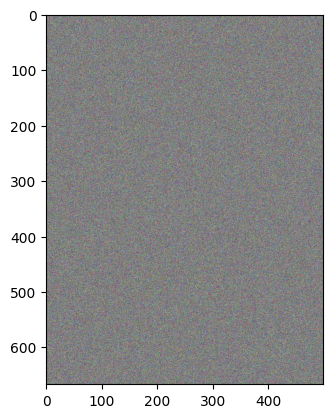

In [16]:
plt.imshow(noise)

In [21]:
image = img / 255.0

In [22]:
new_image = image + noise
new_image.min(), new_image.max(), new_image.mean(), new_image.std()

(Array(0.11410853, dtype=float32),
 Array(1.8716927, dtype=float32),
 Array(0.95421576, dtype=float32),
 Array(0.26887897, dtype=float32))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11410853..1.8716927].


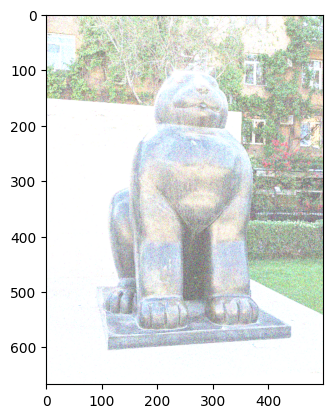

In [23]:
plt.imshow(new_image)

## A horizontal flip

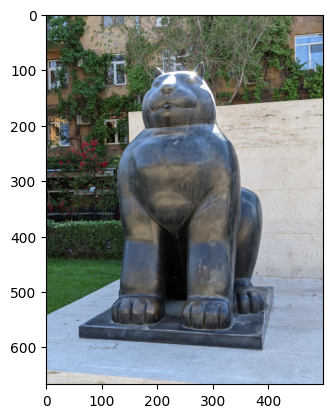

In [24]:
image_flipped = image[:, ::-1, :]
plt.imshow(image_flipped)

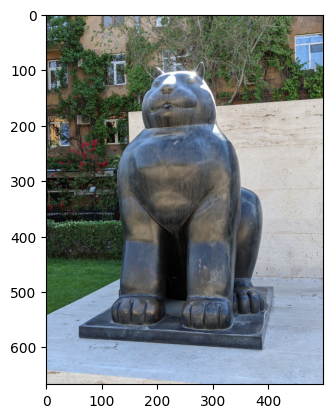

In [25]:
image_flipped = jnp.fliplr(image)
plt.imshow(image_flipped)

## Performing random augmentations

In [26]:
key

Array((), dtype=key<fry>) overlaying:
[ 0 42]

In [27]:
key1, key2 = jr.split(key)
key1, key2

(Array((), dtype=key<fry>) overlaying:
 [1832780943  270669613],
 Array((), dtype=key<fry>) overlaying:
 [  64467757 2916123636])

In [29]:
def add_noise(image, rng_key):
    noise = 0.5 + 0.1 * jr.normal(rng_key, image.shape)
    new_image = image + noise
    new_image = (new_image - new_image.min()) / (new_image.max() - new_image.min())
    return new_image

In [34]:
augmentations = [
    add_noise,
    lambda x, key: jnp.fliplr(x),
]

In [35]:
def random_augmentation(image, augmentations, rng_key):
    key1, key2 = jr.split(rng_key)
    augmentation_idx = jr.randint(key=key1, minval=0, 
                                  maxval=len(augmentations), shape=())
    augmented_image = jax.lax.switch(
        augmentation_idx, augmentations, image, key2
    )
    return augmented_image

In [36]:
key = jr.key(4242)

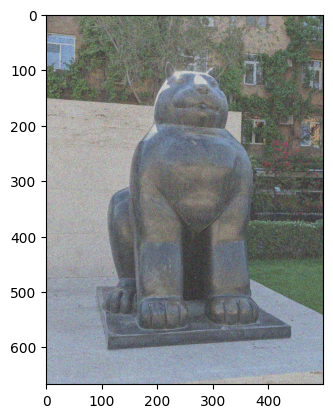

In [37]:
image_aug = random_augmentation(image, augmentations, key)
plt.imshow(image_aug)

## Numpy PRNG

In [41]:
import numpy as np
from numpy import random
from numpy.random import default_rng

In [42]:
rng = default_rng()
vals = rng.normal(loc=0.5, scale=0.1, size=(3, 5))
more_vals = rng.normal(loc=0.5, scale=0.1, size=(3, 5))
vals, more_vals

(array([[0.45879781, 0.43006299, 0.51154182, 0.50356447, 0.36374889],
        [0.47998945, 0.72376906, 0.52692486, 0.63513868, 0.48407395],
        [0.34634252, 0.44499043, 0.50929666, 0.52215354, 0.64615907]]),
 array([[0.41411929, 0.61371454, 0.53851603, 0.52663525, 0.57510088],
        [0.32308464, 0.48213926, 0.68905328, 0.40801101, 0.58335347],
        [0.44979266, 0.4755453 , 0.53730226, 0.56361181, 0.57094472]]))

### Controlling seed

In [48]:
random.seed(42)
vals = random.normal(loc=0.5, scale=0.1, size=(3, 5))
random.seed(42)
more_vals = random.normal(loc=0.5, scale=0.1, size=(3, 5))
random.seed(42)
even_more_vals = np.array(
    [random.normal(loc=0.5, scale=0.1) for _ in range(3*5)]
).reshape((3, 5))

In [49]:
vals

array([[0.54967142, 0.48617357, 0.56476885, 0.65230299, 0.47658466],
       [0.4765863 , 0.65792128, 0.57674347, 0.45305256, 0.554256  ],
       [0.45365823, 0.45342702, 0.52419623, 0.30867198, 0.32750822]])

In [50]:
more_vals

array([[0.54967142, 0.48617357, 0.56476885, 0.65230299, 0.47658466],
       [0.4765863 , 0.65792128, 0.57674347, 0.45305256, 0.554256  ],
       [0.45365823, 0.45342702, 0.52419623, 0.30867198, 0.32750822]])

In [51]:
even_more_vals

array([[0.54967142, 0.48617357, 0.56476885, 0.65230299, 0.47658466],
       [0.4765863 , 0.65792128, 0.57674347, 0.45305256, 0.554256  ],
       [0.45365823, 0.45342702, 0.52419623, 0.30867198, 0.32750822]])

### Looking at the state:

In [52]:
random.seed(42)

In [53]:
state = random.get_state()

In [54]:
type(state), state[0]

(tuple, 'MT19937')

In [55]:
state[1].shape

(624,)

In [56]:
state[2], state[3], state[4]

(624, 0, 0.0)

In [57]:
state

('MT19937',
 array([        42, 3107752595, 1895908407, 3900362577, 3030691166,
        4081230161, 2732361568, 1361238961, 3961642104,  867618704,
        2837705690, 3281374275, 3928479052, 3691474744, 3088217429,
        1769265762, 3769508895, 2731227933, 2930436685,  486258750,
        1452990090, 3321835500, 3520974945, 2343938241,  928051207,
        2811458012, 3391994544, 3688461242, 1372039449, 3706424981,
        1717012300, 1728812672, 1688496645, 1203107765, 1648758310,
         440890502, 1396092674,  626042708, 3853121610,  669844980,
        2992565612,  310741647, 3820958101, 3474052697,  305511342,
        2053450195,  705225224, 3836704087, 3293527636, 1140926340,
        2738734251,  574359520, 1493564308,  269614846,  427919468,
        2903547603, 2957214125,  181522756, 4137743374, 2557886044,
        3399018834, 1348953650, 1575066973, 3837612427,  705360616,
        4138204617, 1604205300, 1605197804,  590851525, 2371419134,
        2530821810, 4183626679, 2872

## jax PRNG

In [58]:
key = jr.key(42)
type(key)

jax._src.prng.PRNGKeyArray

In [59]:
key

Array((), dtype=key<fry>) overlaying:
[ 0 42]

In [60]:
vals = jr.normal(key, shape=(3,5))
vals

Array([[-0.02830462,  0.46713185,  0.29570296,  0.15354592, -0.12403282],
       [ 0.21692315, -1.4408789 ,  0.7558599 ,  0.52140963,  0.9101704 ],
       [-0.3844966 ,  1.1398233 ,  1.4457862 ,  1.0809066 , -0.05629321]],      dtype=float32)

In [61]:
more_vals = jr.normal(key, shape=(3,5))
more_vals

Array([[-0.02830462,  0.46713185,  0.29570296,  0.15354592, -0.12403282],
       [ 0.21692315, -1.4408789 ,  0.7558599 ,  0.52140963,  0.9101704 ],
       [-0.3844966 ,  1.1398233 ,  1.4457862 ,  1.0809066 , -0.05629321]],      dtype=float32)

### Splitting the key to produce multiple keys

In [62]:
key = jr.key(42)
key1, key2 = jr.split(key, num=2)

In [63]:
key

Array((), dtype=key<fry>) overlaying:
[ 0 42]

In [65]:
vals = jr.normal(key1, shape=(3, 5))
more_vals = jr.normal(key2, shape=(3, 5))

In [66]:
key1, key2

(Array((), dtype=key<fry>) overlaying:
 [1832780943  270669613],
 Array((), dtype=key<fry>) overlaying:
 [  64467757 2916123636])

In [67]:
vals, more_vals

(Array([[ 0.07592554, -0.48634264,  1.2903206 ,  0.5196119 ,  0.30040437],
        [ 0.31034866,  0.5761609 , -0.8074621 , -1.9883217 ,  0.6395295 ],
        [ 0.21763174,  0.00247425,  1.6645706 ,  0.20313536, -0.02138225]],      dtype=float32),
 Array([[ 0.60576403,  0.7990441 , -0.908927  , -0.63525754, -1.2226585 ],
        [-0.83226097, -0.47417238, -1.2504351 , -0.17678244, -0.04917514],
        [-0.41177532, -0.39363015,  1.3116323 ,  0.21555556,  0.41164538]],      dtype=float32))

### Generating many keys at once

In [68]:
key = jr.key(42)
key, *subkeys = jr.split(key, num=100)

In [70]:
key

Array((), dtype=key<fry>) overlaying:
[1832780943  270669613]

In [71]:
len(subkeys)

99

In [72]:
type(subkeys)

list

### Generating new keys using `fold_in()`

In [74]:
key = jr.key(42)
for i in range(5):
    new_key = jr.fold_in(key, i)
    print(new_key)
    vals = jr.normal(new_key, shape=(3, 5))
    # do something with values

Array((), dtype=key<fry>) overlaying:
[1832780943  270669613]
Array((), dtype=key<fry>) overlaying:
[  64467757 2916123636]
Array((), dtype=key<fry>) overlaying:
[2465931498  255383827]
Array((), dtype=key<fry>) overlaying:
[3134548294  894150801]
Array((), dtype=key<fry>) overlaying:
[2954079971 3276725750]


### Using a string to fold into a new key

In [76]:
import hashlib

def my_hash(s):
    return int(hashlib.sha1(s.encode()).hexdigest()[:8], base=16)

some_string = 'layer7_2'
some_int = my_hash(some_string)

In [78]:
some_int

2649017889

In [79]:
key = jr.key(42)
new_key = jr.fold_in(key, some_int)
new_key

Array((), dtype=key<fry>) overlaying:
[3110527424 3716265121]